In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_email = pd.read_csv('hw3Data/emails.csv', header=0).values[:,1:].astype(np.int32)

In [3]:
def euclidean_distances(train_data, test_instance):
    return np.sqrt(np.sum((train_data - test_instance) ** 2, axis=1))

def kNN(train_data, train_label, test_data, k):
    distances = euclidean_distances(train_data, test_data)
    k_nearest_indices = distances.argsort()[:k]
    k_nearest_labels = train_label[k_nearest_indices]

    count_ones = np.sum(k_nearest_labels == 1)
    count_zeros = k - count_ones

    predicted_label = 1 if count_ones > count_zeros else 0
    return predicted_label

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

k = 1, Average Accuracy: 83.44%
k = 3, Average Accuracy: 84.10%
k = 5, Average Accuracy: 84.18%
k = 7, Average Accuracy: 84.52%
k = 10, Average Accuracy: 85.58%


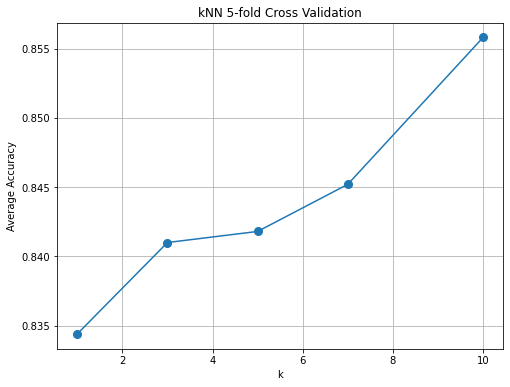

In [4]:
X = data_email[:,:-1]
y = data_email[:,-1]

num_folds = 5
fold_size = len(y) // num_folds
k_values = [1, 3, 5, 7, 10]
avg_accuracies = []

for k in k_values:
    fold_accuracies = []
    
    for fold in range(num_folds):
        val_start = fold * fold_size
        val_end = (fold + 1) * fold_size
        
        X_val, y_val = X[val_start:val_end], y[val_start:val_end]
        X_train = np.concatenate((X[:val_start], X[val_end:]), axis=0)
        y_train = np.concatenate((y[:val_start], y[val_end:]), axis=0)
        
        correct_predictions = 0
        for i in range(len(X_val)):
            test_instance = X_val[i]
            prediction = kNN(X_train, y_train, test_instance, k)
            if prediction == y_val[i]:
                correct_predictions += 1
        
        acc = correct_predictions / len(X_val)        
        fold_accuracies.append(acc)

    avg_accuracy = np.mean(fold_accuracies)
    avg_accuracies.append(avg_accuracy)
    print(f"k = {k}, Average Accuracy: {avg_accuracy*100:.2f}%")

fig2 = plt.figure(figsize=(8, 6))
plt.plot(k_values, avg_accuracies, '-o', markersize=8)
plt.xlabel("k")
plt.ylabel("Average Accuracy")
plt.title("kNN 5-fold Cross Validation")
plt.grid(True)
plt.show()
fig2.savefig('P2.4_kNN_5fold.png')